<a href="https://colab.research.google.com/github/Eunjung-Cho/python_study/blob/master/tableau/tabpy0617.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install tabpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install tabpy-client

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import tabpy_client
connection = tabpy_client.Client('http://localhost:9004/')

In [ ]:
pip install pandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd

In [ ]:
pip install --upgrade xlrd

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
superstore = pd.read_excel('/content/drive/MyDrive/코딩실험/tabpy/Sample - Superstore.xls')

In [ ]:
superstore.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [ ]:
data = superstore[['Order Date' , 'Sales']]
data = data.sort_values(by = 'Order Date')

In [ ]:
data['Order Date'] = pd.to_datetime(data['Order Date'])
data.index = data['Order Date']
data = data.resample('M').sum()

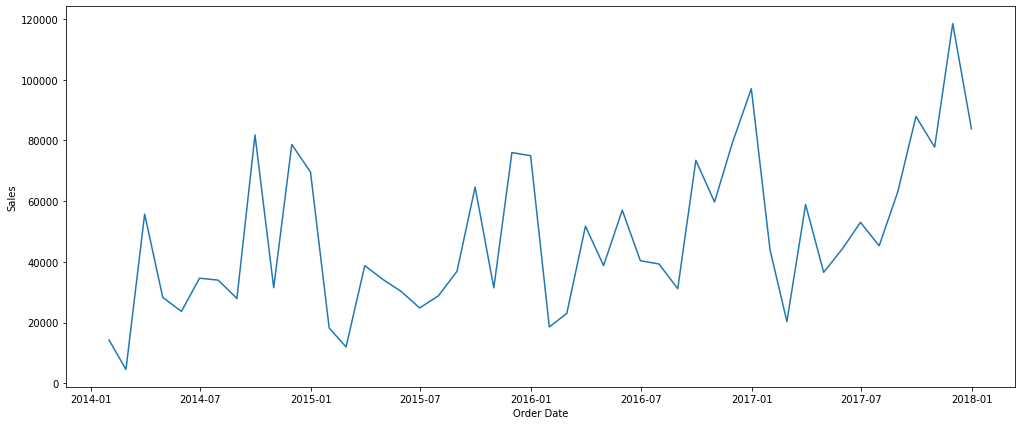

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.subplots(figsize = (17,7))
sns.lineplot(x = "Order Date", y = "Sales", data = data)
plt.show()

In [ ]:
import numpy as np
import statsmodels.api as sm
from statsmodels.tsa.api import Holt
import dateutil
import datetime
import warnings
warnings.filterwarnings('ignore')

 #use for training entire dataset
data = data[:-(6)]

#create future dataset
step = dateutil.relativedelta.relativedelta(months=1)
start = data.index[len(data)-1] + step
index = pd.date_range(start, periods=6, freq='M')
columns = ['Sales']
df = pd.DataFrame(index=index, columns=columns)
df = df.fillna(0)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
#Fit the model
model = Holt(np.asarray(data['Sales'])).fit(smoothing_level = 0.3,smoothing_slope = 0.1)
df['Sales']=model.forecast(6)
df = df.fillna(0)
x = pd.concat([data,df])
x

,Sales
2014-01-31,14236.895000
2014-02-28,4519.892000
2014-03-31,55691.009000
2014-04-30,28295.345000
2014-05-31,23648.287000
2014-06-30,34595.127600
2014-07-31,33946.393000
2014-08-31,27909.468500
2014-09-30,81777.350800
2014-10-31,31453.393000


In [ ]:
def holts_linear_method(_arg1,_arg2,_arg3):
    import pandas as pd
    from pandas import DataFrame
    import numpy as np
    import matplotlib.pyplot as plt
    import seaborn as sns
    from statsmodels.tsa.api import Holt
    import warnings
    import dateutil
    warnings.filterwarnings('ignore')

    data = DataFrame({'Period': _arg1,'Net Sales': _arg2})
    data = data.sort_values(by = 'Period')
    data['Period'] = pd.to_datetime(data['Period'])

    #use for training entire dataset
    data.index = pd.to_datetime(data['Period'])
    data = data.resample('M').mean()
    data = data[:-(_arg3)]

    #create future dataset
    step = dateutil.relativedelta.relativedelta(months=1)
    start = data.index[len(data)-1] + step
    index = pd.date_range(start, periods=_arg3, freq='M')
    columns = ['Net Sales']
    df = pd.DataFrame(index=index, columns=columns)
    df = df.fillna(0)

    #Fit the model
    fit1 = Holt(np.asarray(data['Net Sales'])).fit(smoothing_level = 0.3,smoothing_slope = 0.1)
    df['Net Sales']=fit1.forecast(_arg3)
    df = df.fillna(0)
    x = pd.concat([data, df])
    return x['Net Sales'].tolist()



In [ ]:
connection.deploy('Holt Linear Method', holts_linear_method,'Returns forecast of revenue', override=True)

In [ ]:
def sarima_method(_arg1,_arg2,_arg3):
    import pandas as pd
    from pandas import DataFrame
    import numpy as np
    import matplotlib.pyplot as plt
    import seaborn as sns
    import statsmodels.api as sm
    import dateutil
    import datetime
    import warnings
    warnings.filterwarnings('ignore')

    data = DataFrame({'Period': _arg1,'Net Sales': _arg2})
    data = data.sort_values(by = 'Period')
    data['Period'] = pd.to_datetime(data['Period'])

    #use for training entire dataset
    data.index = pd.to_datetime(data['Period'])
    data = data.resample('M').mean()
    data = data[:-(_arg3)]

    #create future dataset
    step = dateutil.relativedelta.relativedelta(months=1)
    start = data.index[len(data)-1] + step
    index = pd.date_range(start, periods=_arg3, freq='M')
    columns = ['Net Sales']
    df = pd.DataFrame(index=index, columns=columns)
    df = df.fillna(0)

    #Fit the model

    fit1 = sm.tsa.statespace.SARIMAX(data['Net Sales'], order=(1, 1, 1),seasonal_order=(1,1,1,12)).fit()
    df['Net Sales']=fit1.forecast(_arg3)
    df = df.fillna(0)
    x = pd.concat([data, df])
    return x['Net Sales'].tolist()





In [ ]:
connection.deploy('Seasonal ARIMA Method',sarima_method,'Returns forecast of revenue', override=True)

In [ ]:
def sarima_method(_arg1,_arg2,_arg3):
    import pandas as pd
    from pandas import DataFrame
    import numpy as np
    import matplotlib.pyplot as plt
    import seaborn as sns
    import statsmodels.api as sm
    import dateutil
    import datetime
    import warnings
    warnings.filterwarnings('ignore')

    data = DataFrame({'Period': _arg1,'Net Sales': _arg2})
    data = data.sort_values(by = 'Period')
    data['Period'] = pd.to_datetime(data['Period'])

    #use for training entire dataset
    data.index = pd.to_datetime(data['Period'])
    data = data.resample('M').mean()
    data = data[:-(_arg3)]

    #create future dataset
    step = dateutil.relativedelta.relativedelta(months=1)
    start = data.index[len(data)-1] + step
    index = pd.date_range(start, periods=_arg3, freq='M')
    columns = ['Net Sales']
    df = pd.DataFrame(index=index, columns=columns)
    df = df.fillna(0)

    #Fit the model

    fit1 = sm.tsa.statespace.SARIMAX(data['Net Sales'], order=(1, 1, 1),seasonal_order=(1,1,1,12)).fit()
    df['Net Sales']=fit1.forecast(_arg3)
    df = df.fillna(0)
    x = pd.concat([data, df])
    return x['Net Sales'].tolist()




In [ ]:
connection.deploy('Seasonal ARIMA Method',sarima_method,'Returns forecast of revenue', override=True)

ConnectionError: ignored